<a href="https://colab.research.google.com/github/cerasole/EnvironmentalRadioactivity/blob/main/Notebooks/PrimaProva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob
glob.glob("*")

['sample_data']

In [3]:
glob.glob("sample_data/*")

['sample_data/README.md',
 'sample_data/anscombe.json',
 'sample_data/california_housing_train.csv',
 'sample_data/california_housing_test.csv',
 'sample_data/mnist_train_small.csv',
 'sample_data/mnist_test.csv']

In [4]:
glob.glob("sample_data/*.csv")

['sample_data/california_housing_train.csv',
 'sample_data/california_housing_test.csv',
 'sample_data/mnist_train_small.csv',
 'sample_data/mnist_test.csv']

In [5]:
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/GammaRAD5_ExampleFile.txt

--2024-12-02 20:25:52--  https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/GammaRAD5_ExampleFile.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62780 (61K) [text/plain]
Saving to: ‘GammaRAD5_ExampleFile.txt’

GammaRAD5_ExampleFi 100%[===================>]  61.31K  --.-KB/s    in 0.03s   

2024-12-02 20:25:52 (2.09 MB/s) - ‘GammaRAD5_ExampleFile.txt’ saved [62780/62780]



In [6]:
glob.glob("*")

['GammaRAD5_ExampleFile.txt', 'sample_data']

In [10]:
filename = "GammaRAD5_ExampleFile.txt"
adc, counts = np.loadtxt(filename, skiprows = 5, unpack = True)

In [11]:
adc

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 8.189e+03, 8.190e+03,
       8.191e+03])

In [12]:
counts

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
len(adc), len(counts)

(8192, 8192)

In [14]:
esempio_lista = [1, 2, 3, 4, 5]
esempio_vettore_numpy = np.array([1, 2, 3, 4, 5])

In [15]:
esempio_lista + esempio_lista

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [16]:
esempio_vettore_numpy + esempio_vettore_numpy

array([ 2,  4,  6,  8, 10])

In [17]:
3*esempio_vettore_numpy**2

array([ 3, 12, 27, 48, 75])

In [26]:
p0, p1 = 526, 2.35
energy = (adc - p0) / p1

In [19]:
np.min(energy), np.max(energy)

(-239.09090909090907, 3484.090909090909)

In [20]:
np.sum(counts)

1222845.0

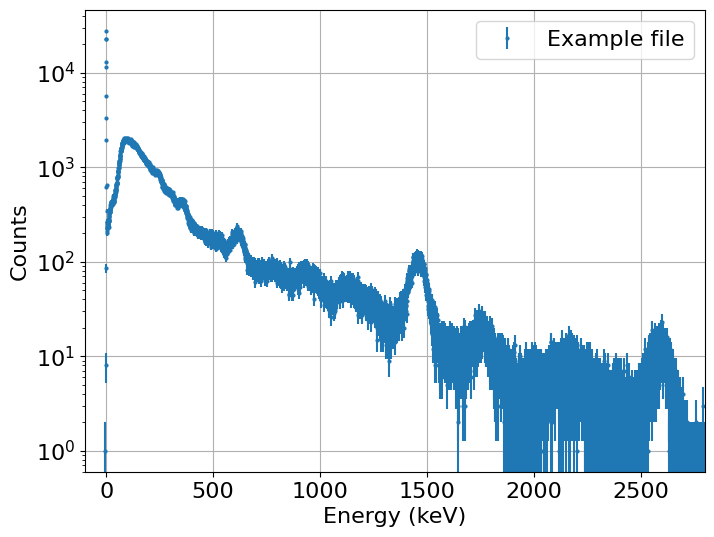

In [29]:
plt.rc("font", size = 16)

fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(energy, counts, yerr = np.sqrt(counts),
            linestyle = "None", marker = "o", markersize = 2,
            label = "Example file", color = "tab:blue")
ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Counts")
ax.set_xlim(left = -100, right = 2800)
ax.grid()
ax.set_yscale("log")
ax.legend()
plt.show()

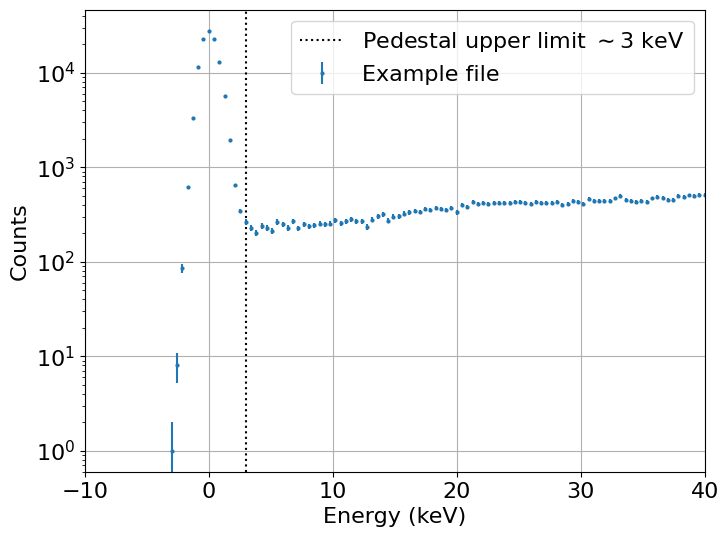

In [35]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(energy, counts, yerr = np.sqrt(counts),
            linestyle = "None", marker = "o", markersize = 2,
            label = "Example file", color = "tab:blue")
ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Counts")
ax.set_xlim(left = -10, right = 40)   ### Faccio zoom del piedistallo
ax.axvline(
    3,
    linestyle = "dotted", color = "black",
    label = "Pedestal upper limit $\sim 3$ keV"
)
ax.grid()
ax.set_yscale("log")
ax.legend()
plt.show()

In [40]:
mask = energy > 3   ### Questa è una maschera in Python
mask

array([False, False, False, ...,  True,  True,  True])

In [41]:
len(counts), len(counts[mask])


(8192, 7658)

In [42]:
np.sum(counts[mask])   ### Eventi con energie maggiori del piedistallo

1112545.0

In [43]:
np.sum(counts) - np.sum(counts[mask])   ### Eventi nel piedistallo

110300.0

In [45]:
(np.sum(counts) - np.sum(counts[mask])) / np.sum(counts[mask]) * 100

9.914205717521538